# Definition and Working Principle

#### We will build a ***linear regression*** model to help predict insurance charges based off of various factors.

A linear regression model is a statistical analysis technique used to model the relationship between one independent variable and one dependent variable. The model assumes a direct correlation between the independent and dependent variables, where the independent variables influence the dependent variable. By calculating the coefficient of determination, or R² value, linear regression helps quantify how much of the trend in the data can be accurately predicted by the linear model, with higher values indicating a better fit.

## Hypothesis representation


We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So the hypothesis fuction can be represented as 

$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   
$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis. This is the equation for **Simple / Univariate Linear regression**. 

For **Multiple Linear regression** , models where more than one independent variable exists. We will use $\mathbf{x_{ij}}$ to denote indepedent variables and $\mathbf{y_{i}}$ to denote the dependent variable. If we have $\mathbf{n}$ independent variables then $\mathbf{j=1,2,3 ..... n}$ and the hypothesis function is represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
where $\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameters of hypothesis,
$\mathbf{m}$ is the number of training samples,
$\mathbf{n}$ is the number of independent variables and
$\mathbf{x_{ij}}$ is the $\mathbf{i^{th}}$ training sample of the $\mathbf{j^{th}}$ feature.



# Analyzing our dataset



In [1]:
import pandas as pd
import numpy as np


In [2]:
insurance = pd.read_csv("insurance.csv")

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print("Number of rows and columns in the data set:" , insurance.shape)

Number of rows and columns in the data set: (1338, 7)


We dont have the largest dataset so finding and removing outliers won't work etc.... (explain what target value is)

Our dataset consists of 1338 rows and 7 columns. Therefore our number of training samples $\mathbf{m}$ is **1338**. Our target/dependent variable is **charges**. The 6 remaining variables **[age, sex, bmi, children, smoker, region]** will be our independent variables. Therefore our hypothesis function can be represented as $$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 age + \theta_2 sex + \theta_3 bmi + \theta_4 children + \theta_5 smoker + \theta_6 region }$$

The multiple linear regression equation for the given dataset can be represented by:  
If $\mathbf{i=2}$ then 
$$\mathbf{h_\theta(x_{2}) = \theta_0+\theta_1 18 + \theta_2 male + \theta_3 33.770 + \theta_4 1 + \theta_5 yes + \theta_6 southeast}$$ 
If $\mathbf{i=5}$ then $$\mathbf{h_\theta(x_{5}) = \theta_0+\theta_1 32 + \theta_2 male + \theta_3 28.880 + \theta_4 0 + \theta_5 no + \theta_6 northwest}$$ 
*Note*: In python index starts from 0.
$$\mathbf{x_1 = \left(\begin{matrix} x_{11} & x_{12} & x_{13} & x_{14} & x_{15} & x_{16}\end{matrix}\right) = \left(\begin{matrix} 19 & female & 27.900 & 1 & no & northwest\end{matrix}\right) }$$

## Encoding

In order to further analyze our dataset we will need to convert categorical data into numerical data in order to allow our machine learning algorithm to work with the data.

We will transform categorical data into numerical data using **Label Encoding**

In [4]:
insurancecopy = insurance.copy()
# y = insurance['charges']

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoded_df = insurancecopy

categorical_columns = ['sex', 'region', 'smoker']

label_encoder = LabelEncoder()

for columns in categorical_columns:

    columns_data = encoded_df[[columns]]

    encoded_df[columns + '_encoded'] = label_encoder.fit_transform(columns_data[columns])

    encoded_df.drop(columns=[columns], inplace=True)

X_encoded = encoded_df.drop("charges", axis = 1)
y = encoded_df['charges']

## Correlation Plot

In [7]:
import seaborn as sns #Visualization
import matplotlib.pyplot as plt

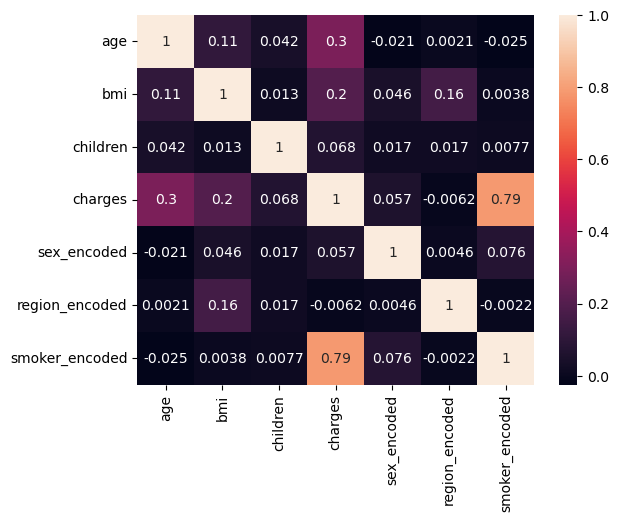

In [8]:
corr = encoded_df.corr()
sns.heatmap(corr, annot = True);

Through our correlation plot, we observe smoking to have the most significant correlation to insurance charges incurred

## Distribution Plot

In [9]:
import matplotlib.pyplot as plt # Visualization

import warnings
warnings.filterwarnings('ignore')

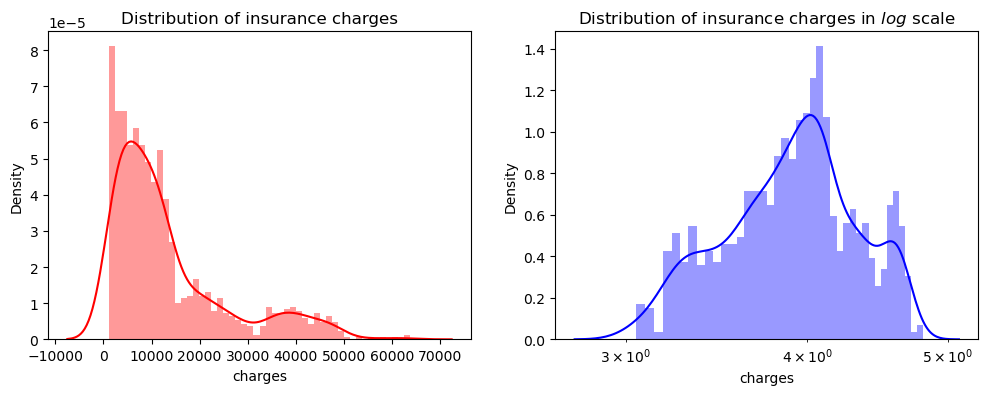

In [10]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(insurance['charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(insurance['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ scale')
ax.set_xscale('log');

Here we observe our data to be skewed to the right however after applying natural log transformation we can see it roughly approximates to a normal graph

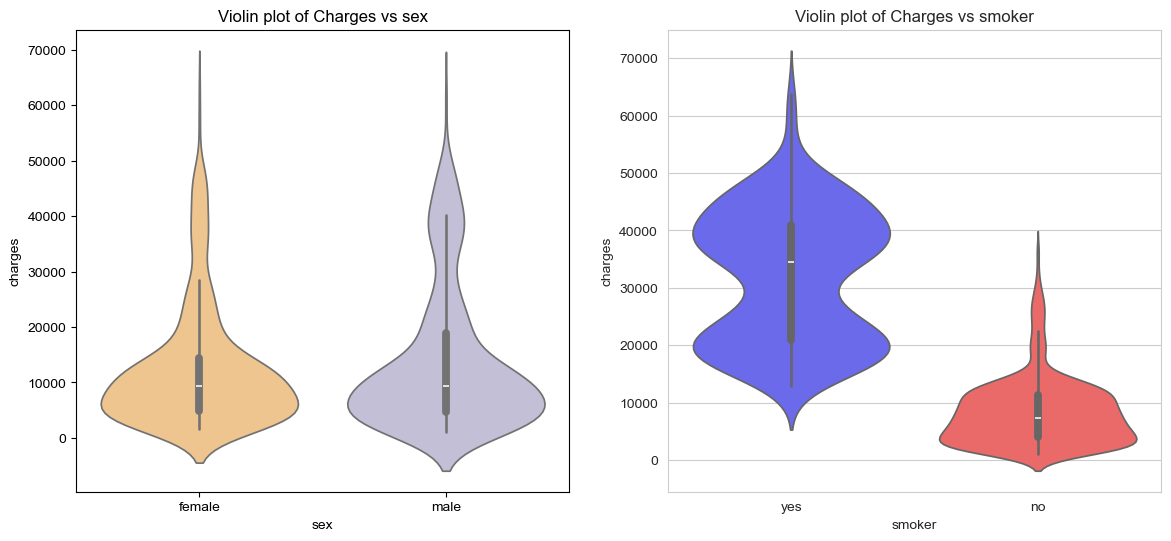

In [11]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.set_style("whitegrid")
sns.violinplot(x='sex', y='charges',data=insurance,palette='PuOr',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.set_style("whitegrid")
sns.violinplot(x='smoker', y='charges',data=insurance,palette='seismic',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

Here we can better visualize the effect being a smoker or not has on insurance charges incurred. On the left we can see that sex doesn't have a great effect on insurance charges however on the right we can see the average insurance cost for non-smokers to be approximately 5000 however for smokers we see the minimum charges to be approximately 5000

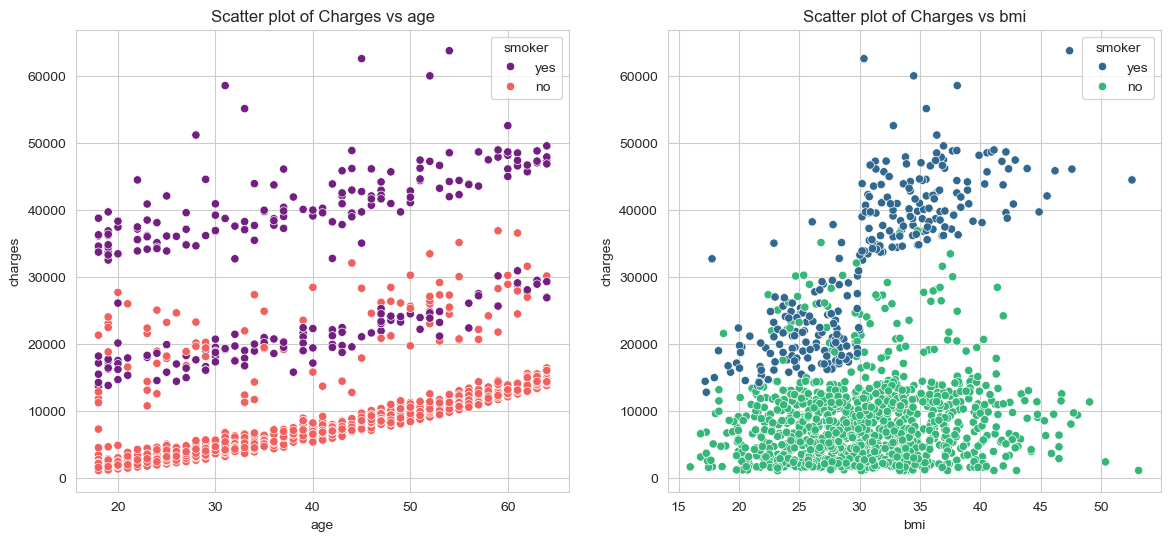

In [12]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=insurance,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=insurance,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

The plot on the left shows that for non-smokers there is a small gradual positive slope relationship between age and charges (barring certain outliers). Plot on the right does not allow us to identify any direct correlation between BMI and charges. However, both our plots reaffirm our earlier observation of smokers incurring higher average charges.

# Initial Linear Regression model

## Train-test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded, y, test_size=0.2, random_state=28)

20% of our data will be used to test while 80% will be used to train our model

## Model Building

In [15]:
from sklearn import linear_model

In [16]:
model = linear_model.LinearRegression()

model.fit(Xtrain, ytrain);

## Model Evaluation

We compute **Mean Square Error** using formula 
$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ is statistical measure of how close the data is to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicates that the model explains none of the variability of the response data around it's mean. 100% indicates that the model explains all the variablity of the response data around the mean.

$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
**SSE = Sum of Square Error**  
**SST = Sum of Square Total**  
$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$
Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

## R²  Value

In [17]:
from sklearn.metrics import r2_score

In [18]:
Y_pred = model.predict(Xtest)
org_r2score = r2_score(ytest, Y_pred)
print("Our R² Value is calculated to be" , org_r2score)

Our R² Value is calculated to be 0.6955075965076165


# Model Optimization

## Normalizing

In [19]:
X_encoded.head()

,age,bmi,children,sex_encoded,region_encoded,smoker_encoded
0,19,27.900,0,0,3,1
1,18,33.770,1,1,2,0
2,28,33.000,3,1,2,0
3,33,22.705,0,1,1,0
4,32,28.880,0,1,1,0


The range values within the independent variables of our dataframe is not consistent, for example, age ranges from 18 to 64 while children ranges from 0 to 5. Therefore features with larger scales, such as age, may have a larger impact on the prediction compared to features with smaller scales. Normalization ensures that all features contribute equally to the model's predictions, regardless of their original scales.

### Robust Scaling

Robust Scaling is defined as
​
$$\mathbf{X_{normalized} = \frac{X_{initial} - {median}}{IQR}}$$ 

We will make use of Robust scaling as our normalization technique as that also allows our model to be more robust to outliers that might exist within our dataframe


In [20]:
X_Scaled = X_encoded
columns = Xtest.columns

for column in columns:
    
    median = Xtest[column].median()
    IQR = Xtest[column].quantile(0.75) - Xtest[column].quantile(0.25)

    if IQR != 0:
        Xtest[column] = (Xtest[column] - median) / IQR 

## Polynomial Features

In linear regression the relationship between the dependent and independent variable is assumed to be linear. We can check this by scatter ploting the Actual value Vs Predicted value.

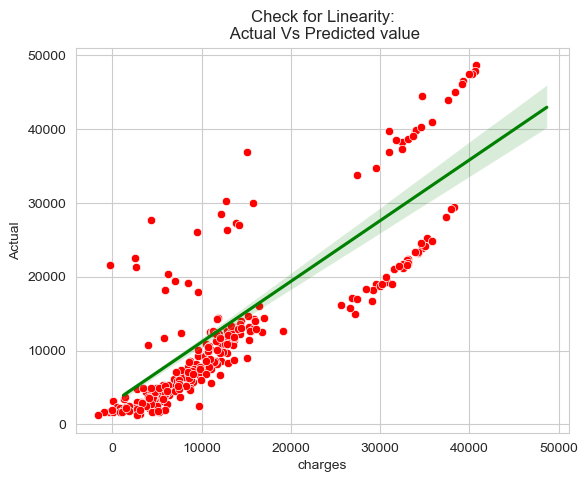

In [31]:
data = pd.DataFrame({'Actual': ytest, 'Predicted': Y_pred})

f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(data=data, x='Predicted', y='Actual', color='r', ax=ax)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value');

sns.regplot(x=ytest, y=Y_pred, scatter=False, color='green', ax=ax);

However, when we plot our actual values against our predicted values we can observe that the relationship is more of a curve than a linear straight line. Furthermore, when we plot our linear regression line (in green), we can observe a significant disparity between the line and the plotted points on our graph. Therefore, our model, in its current state, fails to capture any non linear relationships between our dependent and independent variables. In order to combat this we can include Polynomial Features in our model

### Equation of a model with Polynomial Features 


Adding polynomial features to a linear regression model involves creating new features by raising the original features to higher powers. This allows the model to capture non-linear relationships between the features and the target variable. 

Before adding Polynomial Features, the equation of our Multiple Linear Regression model is

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
where $\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameters of hypothesis,
$\mathbf{m}$ is the number of training samples,
$\mathbf{n}$ is the number of independent variables and
$\mathbf{x_{ij}}$ is the $\mathbf{i^{th}}$ training sample of the $\mathbf{j^{th}}$ feature.

After adding Polynomial Features of degree 2, our model equation is 

$$\mathbf{h_\theta({x})} = \mathbf{\theta}_0 + \mathbf{\theta}_1 \cdot x_1 + \mathbf{\theta}_2 \cdot x_2 + \ldots + \mathbf{\theta}_n \cdot x_n + $$
$$\mathbf{\theta}_{n+1} \cdot x_1^2 + \mathbf{\theta}_{n+2} \cdot x_1 x_2 + \ldots + \mathbf{\theta}_{n+m} \cdot x_n^2$$

where $\mathbf{\theta_0,\theta_1,....,\theta_n }$ are the coefficients of the original independent variables,
$\mathbf{\theta_{n+1},\theta_{n+2},....,\theta_{n+m} }$ are the coefficients of the quadratic terms,
$\mathbf{m}$ is the number of polynomial features of degree 2 and
$\mathbf{n}$ is the number of independent variables


### Implementing Polynomial Features

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [23]:
X_PF = X_Scaled
Y_PF = insurance["charges"]

polyF = PolynomialFeatures(degree = 2)

XpolyF = polyF.fit_transform(X_PF)

X_PF,X_testPF,Y_PF,Y_testPF = train_test_split(XpolyF,Y_PF, test_size=0.2, random_state = 42)

PFmodel = linear_model.LinearRegression()

PFmodel.fit(X_PF, Y_PF);

## Evaluating Optimized Model

In [24]:
from sklearn.metrics import r2_score

In [25]:
YPF_pred = PFmodel.predict(X_testPF)

new_r2score = r2_score(Y_testPF, YPF_pred)

print("Our new r2 score is calculated to be ", new_r2score)

print("We have improved our model by " , ((new_r2score - org_r2score) / org_r2score) * 100, "%")

Our new r2 score is calculated to be  0.8671748765672334
We have improved our model by  24.682301231735995 %


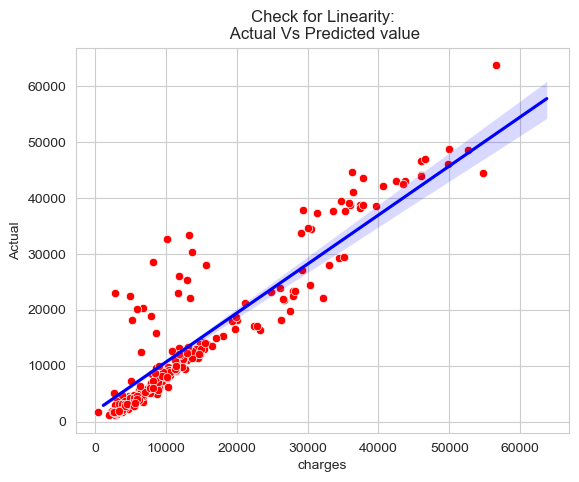

In [26]:
data = pd.DataFrame({'Actual': Y_testPF, 'Predicted': YPF_pred})

f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(data=data, x='Predicted', y='Actual', color='r', ax=ax)
ax.set_title('Check for Linearity:\n Actual Vs Predicted value');

sns.regplot(x=Y_testPF, y=YPF_pred, scatter=False, color='blue', ax=ax);


Evaluating our new regression line with the actual vs predicted values scatter plot we can observe our regression line to much better fit the points on the plot 

## Overfitting concerns

By including polynomial features of higher degrees, the model can capture more complex relationships between the independent variable and the target variable. However, adding polynomial features increases the complexity of the model and can lead to overfitting if not properly regularized.

One way we can evaluate whether or not we have overfit our model is by using Ridge Regression. In Ridge regression, a penalty term that penalizes large coefficients is added to the cost function of the linear regression model. This penalty term is proportional to the square of the magnitude of the coefficients, thus shrinking them towards zero. Therefore, Ridge regression encourages the model to learn simpler patterns by reducing the impact of large coefficients, thereby reducing overfitting.

### Ridge Regression

The cost function $\mathbf{J}$ can be represented as 

$$\mathbf{J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum_{i=1}^{n} \theta_i^2}$$

where

$\mathbf{\text{MSE}(\boldsymbol{\theta}})$ is the mean squared error (MSE) of the model, which measures the difference between the actual and predicted values.

$\mathbf{\alpha}$ is the regularization parameter, also known as the regularization strength. It controls the amount of regularization applied to the model. Higher values of $\mathbf{\alpha}$ result in stronger regularization.

$\mathbf{\sum_{i=1}^{n} \theta_i^2}$ is the sum of squared coefficients (excluding the intercept term) of the linear regression model.

Therefore, our model equation $\mathbf{h_\theta({x})}$ will now be

$$\mathbf{\mathbf{h_\theta({x})} = \mathbf{h_\theta({x})} +\mathbf{\alpha \sum_{i=1}^{n} \theta_i^2}}$$

### Implementing

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [28]:
ridge_model = Ridge()

ridge_model.fit(X_PF, Y_PF)

YR_pred = ridge_model.predict(X_testPF)

RidgeScore = r2_score(Y_testPF, YR_pred)

print("Our new calculated R² score is" , RidgeScore)

print("The difference in our R² scores before and after Ridge Regression is", RidgeScore - new_r2score)

Our new calculated R² score is 0.8681244815035882
The difference in our R² scores before and after Ridge Regression is 0.0009496049363548753


Due to the miniscule difference calculated in our R² values before and after implementing Ridge Regression we can safely assume that our model does not overfit

# Final Notes

Overall, we were able to create an initial model that yielded a R² score of approximately 0.695 and through various optimization techniques we were able to improve the model to a very solid R² score of approximately 0.867